## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import cv2
from scipy.ndimage.filters import gaussian_filter

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from pandas_ml import ConfusionMatrix

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

## Read Dataset

In [2]:
df = pd.read_excel("Labels.xlsx")
df.head()

,Image_ID,Label
0,002c21358ce6,0
1,005b95c28852,0
2,0097f532ac9f,0
3,00cc2b75cddd,0
4,00f6c1be5a33,0


In [3]:
df.describe()

,Label
count,200.000000
mean,0.500000
std,0.501255
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


## Function to  read, preprocess and flatten images

In [4]:
def read_preprocess(name):
    path = 'ImageData/' + name + '.png'
    frame = cv2.imread(path)
    imG = cv2.equalizeHist(frame[:,:,1])
    blG = gaussian_filter(np.max(imG) - imG, sigma=50)  
    fG = ( blG < np.mean(blG) )* (np.max(imG) - imG)
    pifG = (fG/np.mean(fG))**2
    pifG = (pifG * (255/np.max(pifG))).astype(int)
    frame[:,:,1] = pifG
    fr = cv2.resize(frame,(256,256), interpolation = cv2.INTER_AREA)
    fg = fr[:,:,1]
    fg1 = np.max(fg**2) - fg**2
    fg2 = (fg1>245) * fg1
    fg3 = (fg2>=248) * 255
    
    return (fg3.reshape(256*256))/255  

In [5]:
def CR(Ypred,Ytrue):
    rep = classification_report(y_pred = Ypred ,y_true=Ytrue,)
    det = np.array( [ [float(x.strip()) for x in rep.split('\n')[2].split('     ')[3:6] ], [float(x.strip()) for x in rep.split('\n')[3].split('     ')[3:6] ]])
    dd = pd.DataFrame()
    dd['Precision'] = det.T[0]
    dd['Recall'] = det.T[1]
    dd['f1_score'] = det.T[2]
    return dd

## Feature Matrix

In [6]:
X = np.zeros((len(df['Image_ID']),(256*256)))

In [7]:
for i in range(len(df['Image_ID'])):
    print("pocessing", i)
    X[i] = read_preprocess(df['Image_ID'][i])

pocessing 0
pocessing 1
pocessing 2
pocessing 3
pocessing 4
pocessing 5
pocessing 6
pocessing 7
pocessing 8
pocessing 9
pocessing 10
pocessing 11
pocessing 12
pocessing 13
pocessing 14
pocessing 15
pocessing 16
pocessing 17
pocessing 18
pocessing 19
pocessing 20
pocessing 21
pocessing 22
pocessing 23
pocessing 24
pocessing 25
pocessing 26
pocessing 27
pocessing 28
pocessing 29
pocessing 30
pocessing 31
pocessing 32
pocessing 33
pocessing 34
pocessing 35
pocessing 36
pocessing 37
pocessing 38
pocessing 39
pocessing 40
pocessing 41
pocessing 42
pocessing 43
pocessing 44
pocessing 45
pocessing 46
pocessing 47
pocessing 48
pocessing 49
pocessing 50
pocessing 51
pocessing 52
pocessing 53
pocessing 54
pocessing 55
pocessing 56
pocessing 57
pocessing 58
pocessing 59
pocessing 60
pocessing 61
pocessing 62
pocessing 63
pocessing 64
pocessing 65
pocessing 66
pocessing 67
pocessing 68
pocessing 69
pocessing 70
pocessing 71
pocessing 72
pocessing 73
pocessing 74
pocessing 75
pocessing 76
pocessing

## Labels

In [8]:
y = np.array(df['Label'])

## Train : Test = 60:40

In [9]:
Xtr, Xt, ytr, yt = train_test_split(X,y, test_size = 0.4, train_size = 0.6)

### SVM Classifier

In [10]:
clf_SVM = SVC(gamma = 'auto')

In [11]:
clf_SVM.fit(Xtr,ytr)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
yp_SVM = clf_SVM.predict(Xt)

In [13]:
cr_SVM = CR(yp_SVM,yt)
cr_SVM

,Precision,Recall,f1_score
0,0.68,0.69,0.68
1,0.74,0.73,0.74


### Random Forest

In [14]:
clf_RF = RandomForestClassifier(n_estimators=100, max_depth=40,random_state=0)

In [15]:
clf_RF.fit(Xtr,ytr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=40, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [16]:
yp_RF = clf_RF.predict(Xt)

In [17]:
cr_RF = CR(yp_RF,yt)
cr_RF

,Precision,Recall,f1_score
0,0.83,0.69,0.76
1,0.78,0.89,0.83


### Decision Tree

In [18]:
clf_DT = DecisionTreeClassifier()

In [19]:
clf_DT.fit(Xtr,ytr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
yp_DT = clf_DT.predict(Xt)

In [21]:
cr_DT = CR(yp_DT,yt)
cr_DT

,Precision,Recall,f1_score
0,0.70,0.64,0.67
1,0.72,0.77,0.75


### K Nearest Neighbors

In [22]:
clf_KNN = KNeighborsClassifier(n_neighbors=3)

In [23]:
clf_KNN.fit(Xtr,ytr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [24]:
yp_KNN = clf_KNN.predict(Xt)

In [25]:
cr_KNN = CR(yp_KNN,yt)
cr_KNN

,Precision,Recall,f1_score
0,0.64,0.83,0.72
1,0.82,0.61,0.70


### Store Model

In [26]:
Models = {}

In [27]:
Models['60-40'] = [clf_SVM, clf_RF, clf_DT, clf_KNN]

## Train : Test = 70:30

In [28]:
Xtr, Xt, ytr, yt = train_test_split(X,y, test_size = 0.3, train_size = 0.7)

### SVM Classifier

In [29]:
clf_SVM = SVC(gamma = 'auto')
clf_SVM.fit(Xtr,ytr)
yp_SVM = clf_SVM.predict(Xt)
cr_SVM = CR(yp_SVM,yt)
cr_SVM

,Precision,Recall,f1_score
0,0.70,0.81,0.75
1,0.83,0.74,0.78


### Random Forest

In [30]:
clf_RF = RandomForestClassifier()
clf_RF.fit(Xtr,ytr)
yp_RF = clf_RF.predict(Xt)
cr_RF = CR(yp_RF,yt)
cr_RF

C:\Users\Sumit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,Precision,Recall,f1_score
0,0.71,0.92,0.8
1,0.92,0.71,0.8


### Decision Tree

In [31]:
clf_DT = DecisionTreeClassifier()
clf_DT.fit(Xtr,ytr)
yp_DT = clf_DT.predict(Xt)
cr_DT = CR(yp_DT,yt)
cr_DT

,Precision,Recall,f1_score
0,0.53,0.62,0.57
1,0.67,0.59,0.62


### K Nearest Neighbors

In [32]:
clf_KNN = KNeighborsClassifier(n_neighbors=3)
clf_KNN.fit(Xtr,ytr)
yp_KNN = clf_KNN.predict(Xt)
cr_KNN = CR(yp_KNN,yt)
cr_KNN

,Precision,Recall,f1_score
0,0.68,0.88,0.77
1,0.88,0.68,0.77


### Store Model

In [33]:
Models['70-30'] = [clf_SVM, clf_RF, clf_DT, clf_KNN]

## Train : Test = 80:20

In [34]:
Xtr, Xt, ytr, yt = train_test_split(X,y, test_size = 0.2, train_size = 0.8)

### SVM Classifier

In [35]:
clf_SVM = SVC(gamma = 'auto')
clf_SVM.fit(Xtr,ytr)
yp_SVM = clf_SVM.predict(Xt)
cr_SVM = CR(yp_SVM,yt)
cr_SVM

,Precision,Recall,f1_score
0,0.81,0.85,0.83
1,0.84,0.80,0.82


### Random Forest

In [36]:
clf_RF = RandomForestClassifier(n_estimators=100, max_depth=40,random_state=0)
clf_RF.fit(Xtr,ytr)
yp_RF = clf_RF.predict(Xt)
cr_RF = CR(yp_RF,yt)
cr_RF

,Precision,Recall,f1_score
0,0.84,0.80,0.82
1,0.81,0.85,0.83


### Decision Tree

In [37]:
clf_DT = DecisionTreeClassifier()
clf_DT.fit(Xtr,ytr)
yp_DT = clf_DT.predict(Xt)
cr_DT = CR(yp_DT,yt)
cr_DT

,Precision,Recall,f1_score
0,0.68,0.75,0.71
1,0.72,0.65,0.68


### K Nearest Neighbors

In [38]:
clf_KNN = KNeighborsClassifier(n_neighbors=3)
clf_KNN.fit(Xtr,ytr)
yp_KNN = clf_KNN.predict(Xt)
cr_KNN = CR(yp_KNN,yt)
cr_KNN

,Precision,Recall,f1_score
0,0.70,0.95,0.81
1,0.92,0.60,0.73


### Store Model

In [39]:
Models['80-20'] = [clf_SVM, clf_RF, clf_DT, clf_KNN]

## Function to predict for a single Image

In [40]:
def read_preprocess_path(path):
    
    frame = cv2.imread(path)
    imG = cv2.equalizeHist(frame[:,:,1])
    blG = gaussian_filter(np.max(imG) - imG, sigma=50)  
    fG = ( blG < np.mean(blG) )* (np.max(imG) - imG)
    pifG = (fG/np.mean(fG))**2
    pifG = (pifG * (255/np.max(pifG))).astype(int)
    frame[:,:,1] = pifG
    fr = cv2.resize(frame,(256,256), interpolation = cv2.INTER_AREA)
    fg = fr[:,:,1]
    fg1 = np.max(fg**2) - fg**2
    fg2 = (fg1>245) * fg1
    fg3 = (fg2>=248) * 255
    
    return (fg3.reshape(256*256))/255  

In [41]:
def Predict(path,ratio,model_index):
    X1 = read_preprocess_path(path)
    X1 = X1.reshape((1,256*256))
    pred = Models[str(ratio)][model_index].predict(X1)
    return pred

In [42]:
Predict('dataset/trainimages/0ceb222f6629.png','70-30',3)

array([1], dtype=int64)

## Confusion Matrix

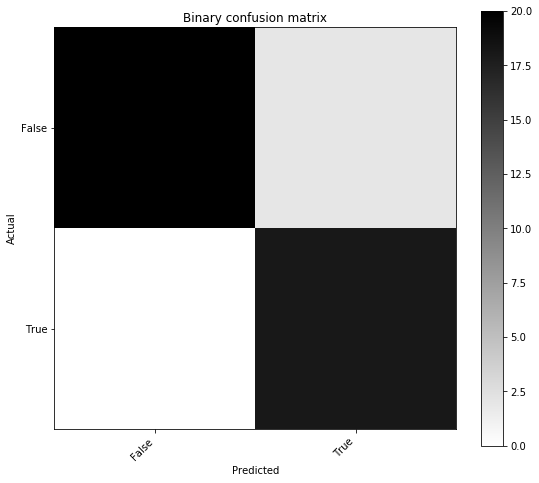

In [43]:
cm = ConfusionMatrix(Models['70-30'][1].predict(Xt),yt)
cm.plot() 

In [44]:
cm

Predicted  False  True  __all__
Actual                         
False         20     2       22
True           0    18       18
__all__       20    20       40